In [15]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

import os
bins = np.linspace(0, 1, 100)
from matplotlib import pyplot
path = '/home/wsai/Newinter/PM/5-Normal/'
list_md = os.listdir(path)
print(len(list_md))
##while phase 4 usr orginal data
list_md_new = []
for i in list_md:
    
    if i[-7:-4] == "new":
        print(i)
        list_md_new.append(i)
for j in list_md_new:        
#     plt.clf()
#     try:
    heat = np.load(path + j)
#     print(len(heat))
#     print(j)
path_mod = '/data/SharedStorage/SharedStorage1/LungCancerWSI/5-negative case/'
list_mod = os.listdir(path_mod)
list_slide = []
print(len(list_md_new))
for i in list_mod:
    if i[-3:] == 'svs':
        list_slide.append(i)
print(len(list_slide))

47
6771new.npy
0025new.npy
4603new.npy
-551new.npy
-745new.npy
2759new.npy
6446new.npy
2951new.npy
7180new.npy
-557new.npy
3757new.npy
2915new.npy
3413new.npy
3682new.npy
3681new.npy
0036new.npy
2736new.npy
5291new.npy
3882new.npy
2288new.npy
6604new.npy
2988new.npy
1637new.npy
3415new.npy
7766new.npy
1314new.npy
9663new.npy
3186new.npy
9326new.npy
3721new.npy
5840new.npy
6445new.npy
4543new.npy
8222new.npy
5749new.npy
8892new.npy
-498new.npy
2521new.npy
8593new.npy
7179new.npy
3683new.npy
5874new.npy
5967new.npy
2737new.npy
9357new.npy
3099new.npy
8431new.npy
47
47


In [16]:
def extractingPatches(inputsvs, outputpath, magnification, patch_extraction_creatia = None,num_of_patches = 2000, 
                      filtering = "GaussianBlur", patch_size = (299,299), upperlimit = 900, 
                      lowerlimit = 300, red_value = (80,220), green_value = (80,200), blue_value = (80, 170),  
                      reconstructedimagepath = None, Annotation = None, Annotatedlevel = 0, Requiredlevel = 0, 
                      Requiredlevel1 = 0,heat=None):
    
    Y= []
    slide1,slidedim = readWSI(inputsvs, "20x", Annotation, Annotatedlevel, Requiredlevel)
    Y_ = []
    Y_s = []
    k = 0 
    k1 = 0 
    ALL_P = []
    ALL_P1 = []
    all_patchs1 = []
    print(inputsvs)
#     patch_count = {'cancer' : 0, 'normal' : 0}
    reconstrcutedimage = np.zeros_like(slide1)
    print(reconstrcutedimage.shape)
    reconstrcutedimage = np.array(reconstrcutedimage, dtype='uint8')
    slide1 = np.array(slide1, dtype='uint8')
    reconstrcutedimagen = cv2.resize(reconstrcutedimage, (int(len(reconstrcutedimage[0])/5),int(len(reconstrcutedimage)/5)),interpolation = cv2.INTER_AREA)
    print(reconstrcutedimagen.shape)
    slide1n = cv2.resize(slide1, (int(len(slide1[0])/5),int(len(slide1)/5)),interpolation = cv2.INTER_AREA)
#     slide1n = cv2.resize(slide1n[0:-225,:-225], (int(len(slide1n[0])),int(len(slide1n))),interpolation = cv2.INTER_AREA)
                                     
                                     #     for i in range(int(len(slide1[0])/299)):
#     for j in range(int(len(slide1)/299)):

#         centerpoint20x = ((j*299+(patch_size[0]/2)),(i*299+(patch_size[1]/2)))
#         sample_img = slide1[int(centerpoint20x[0]-patch_size[0]/2):int(centerpoint20x[0]+patch_size[0]/2),
#                      int(centerpoint20x[1] - patch_size[1]/2): int(centerpoint20x[1] + patch_size[1]/2)]
#         patchs = stainremover_small_patch_remover1(sample_img, patch_size)
#     print(heat)
    heat1 = sorted(np.array(heat),key = lambda x : x[0], reverse = True)
#     print(heat1[0][0])
    
#     print(len(heat1))
    for b in range(len(heat1)):
#         print(b)
        
#         print(heat1[b][1],heat1[b][2])
        j = heat1[b][1]/5
        i = heat1[b][2]/5
#         print(j,i)
        centerpoint20x1 = ((heat1[b][1]*299+(patch_size[0]/2)),(heat1[b][2]*299+(patch_size[1]/2)))
#         print(centerpoint20x1)
        img = plot(heat1[b][0],heat1[0][0],heat1[len(heat1)-1][0])
#         print()
        if b < 100:
            font = cv2.FONT_HERSHEY_SIMPLEX
            text = "%s"%(b+1)
            textsize = cv2.getTextSize(text, font, 1, 1)[0]
            textX = (img.shape[1])/8 
            textY = (img.shape[0])/8 
            cv2.putText(img, text, (0+5,len(img)-15), font, 1, (10,10,10), 2)
        centerpoint20x = ((j*299),(i*299))
#         print(centerpoint20x)
        try:
# #         print(centerpoint20x)

            reconstrcutedimagen[int(centerpoint20x[0] - 44/2):int(centerpoint20x[0]- 44/2+60),
                         int(centerpoint20x[1] - 14/2): int(centerpoint20x[1] - 14/2 + 60)] =  img
        except:
#             print(a)
            None
            
    reconstrcutedimagen[np.where((reconstrcutedimagen == [0,0,0]).all(axis = 2))] = [255,255,255]
            
# #     for i in range(int(len(slide1[0])/299)):
#         for j in range(int(len(slide1)/299)):
            
#             centerpoint20x = ((j*299+(patch_size[0]/2)),(i*299+(patch_size[1]/2)))
#             sample_img = slide1[int(centerpoint20x[0]-patch_size[0]/2):int(centerpoint20x[0]+patch_size[0]/2),
#                          int(centerpoint20x[1] - patch_size[1]/2): int(centerpoint20x[1] + patch_size[1]/2)]
#             patchs = stainremover_small_patch_remover1(sample_img, patch_size)
#             if patchs is None:
#                 None
#             else:
#                 patchs1 = patchs/255
#                 patchs1 = np.expand_dims(patchs1, axis=0)
# #                 y_pred = model.predict(patchs1)
#                 al_p = []
#                 al_p1 = []

#                 intermediate_output,y_pred = intermediate_layer_model.predict(patchs1)
# #                 img = plot(y_pred[0][0])
# #                 y = y_pred[0][0]
# #                 all_patchs1.append(y)
# #                 if y> 0.5: patch_count['cancer'] += 1
# #                 else : patch_count['normal'] += 1
#                 al_20 = np.zeros((1,8,8))
#                 for t in range(len(intermediate_output[0][0][0])):
#                     grad = np.gradient(intermediate_output[:,:,:,t].flatten(),abs(1-y_pred[0][0]+0.00008))
#                     al = sum(grad)
#                     al_20 += al*intermediate_output[:,:,:,t]
#                 al_20 = ReLU(al_20)
#                 ALL_P.append((sorted(al_20.flatten(), reverse=True)))
#                 ALL_P1.append((np.sum(al_20.flatten()),j,i))
# #                 reconstrcutedimage[int(centerpoint20x[0]-patch_size[0]/2):int(centerpoint20x[0]+patch_size[0]/2),
# #                          int(centerpoint20x[1] - patch_size[1]/2): int(centerpoint20x[1] + patch_size[1]/2)] =  img
    return reconstrcutedimagen,slide1n

6445new.npy
/home/wsai/Newinter/PM/5-Normal/6445new.npy
0
/data/SharedStorage/SharedStorage1/LungCancerWSI/5-negative case/5-s12-16445.svs
(20187, 12376, 3)
(4037, 2475, 3)
0.4474471039772034
0.43913523626327516
0.4367550439834595
0.42870072793960573
0.41678796482086183
0.4080908126831055
0.40479092073440553
0.3975127763748169
0.39174900722503664
0.39127401781082155
0.38714758825302126
0.37962524366378786
0.3777472801208496
0.37606827688217165
0.3753545708656311
0.3744773097038269
0.3741677827835083
0.374164146900177
0.3729883260726929
0.3727317876815796
0.3719545431137085
0.37171517086029054
0.37139616680145265
0.3685111827850342
0.36811236810684206
0.3678894467353821
0.3677707142829895
0.3673263020515442
0.3652382321357727
0.36444471549987795
0.3636036343574524
0.36109767627716066
0.35821042728424074
0.35725103092193605
0.3533725566864014
0.34826968383789064
0.34248511266708376
0.34038255882263185
0.3402228779792786
0.33822528791427614
0.3367813057899475
0.33489058685302736
0.3328115

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


-0.008115278959274275
-0.014296638250350935
-0.053304689407348615
-0.059227692365646345
-0.06843671429157255
-0.08572615909576414
-0.0883909784555435
-0.09286245930194853
-0.10247351455688475
-0.12433381605148314
-0.19037185090780256
-0.21124658215045927


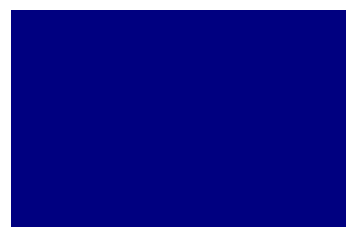

In [19]:
from WSI_Preprocessing.Preprocessing.WSI_Scanning import readWSI
from WSI_Preprocessing.Preprocessing.Denoising import denoising
from WSI_Preprocessing.Preprocessing.Patch_extraction_creatia import patch_extraction_random, all_patches_extarction
from WSI_Preprocessing.Preprocessing.Utilities import stainremover_small_patch_remover1
import openslide
from openslide import (OpenSlide, OpenSlideError,OpenSlideUnsupportedFormatError)
import cv2
import gc
import math
def plot(y_pred,maxi,mini):
    
    print(y_pred)
#     a = np.empty([30,30])
#     print(value)
#     a.fill(math.log10(value+1e-8))
    plt = sns.heatmap(np.array(np.log([[y_pred]])), yticklabels = False, xticklabels = False, cmap='jet', vmin = np.log(0.2), vmax = np.log(1), cbar = False).get_figure()
#     plt = sns.heatmap(np.array(a), yticklabels = False,
#                       xticklabels = False, cmap='jet', 
#                       vmin = 0, vmax = 1, cbar = False).get_figure()
    plt.savefig("example.png")
    img = cv2.imread("example.png")
    img  = np.where(img != [255,255,255],img , img[144,144])
    img = img[10:20,10:20]
    img = cv2.resize(img, (60,60))
    garbage_collector()
    os.remove("example.png")
    return img

# print(len(list_md_new))
for e in range(18
               ,20):
    data = '/data/SharedStorage/SharedStorage1/LungCancerWSI/5-negative case/'+list_slide[e]
    def garbage_collector():
        for j in range(2):
            n = gc.collect()
        return
    for h in list_md_new:
    #     print(h[-8:-4])
        if h[-11:-7] == data[-8:-4]:

            slide = OpenSlide(data)
            slide_dimensions = slide.level_dimensions
            if len(slide_dimensions) == 3:
                print(h)
                heat = np.load(path + h)
                print(path + h)
#                 print(heat)
    #             heat.
    #             for b in range(len(heat)):
    #                 print(heat[b][0])
    #             print(heat.min())

                reconstrcutedimage,slide1 = extractingPatches(data,"temp",magnification = "20x",patch_size= (299,299),Annotation = None,Annotatedlevel = 0, 
                                                       Requiredlevel = 0,Requiredlevel1 = 1,heat = heat)
                cv2.imwrite("/home/wsai/Newinter/PM_all_images/5-Normal/%s.png"%h[-11:-7],reconstrcutedimage)
                cv2.imwrite('/home/wsai/Newinter/PM_all_images/5-Normal/%s_org.png'%h[-11:-7],slide1)
            else:
                heat = np.load(path + h)
                print(h)
                reconstrcutedimage,slide1 = extractingPatches(data,"temp",magnification = "20x",patch_size= (299,299),Annotation = None,  
                                                       Annotatedlevel = 0, Requiredlevel = 1,Requiredlevel1 = 2,heat = heat)
                cv2.imwrite("/home/wsai/Newinter/PM_all_images/5-Normal/%s.png"%h[-11:-7],reconstrcutedimage)
                cv2.imwrite('/home/wsai/Newinter/PM_all_images/5-Normal/%s_org.png'%h[-11:-7],slide1)